<a href="https://colab.research.google.com/github/massirism/PDI-UNS/blob/main/TP3_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

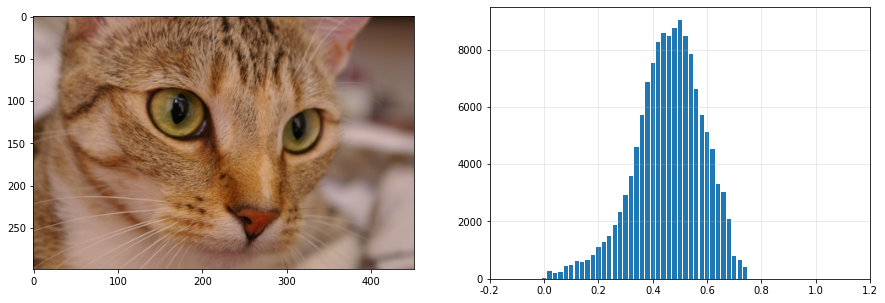

In [ ]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb,'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

#1. Normalizar histograma al rango [0,1].

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

In [ ]:
def Normalizar_Imagen(img):
  #Primero verifico si la imágen es RGB o no
    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      #img=img/255
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
  
    #Minimo y máximos
    min=lum_aux.min()
    max=lum_aux.max()
    print("el minimo es "+str(min)+" y el máx es "+str(max))

    #Normalizar
    lum_normalizada = np.zeros(img.shape[0:2])   # Creo matriz en "blaco", llena de ceros
    lum_normalizada[lum_aux>=max] = 1            # trunco con 1 donde la luminancia sea mayor
    lum_normalizada[(lum_aux>min) & (lum_aux<max)]=(lum_aux[(lum_aux>min) & (lum_aux<max)] - min)/(max-min)   
    #Normalized Image = (Original image - min of image) * ((newMax-newMin) / (ImageMax - ImageMin)) + newMin


    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=lum_normalizada
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=lum_normalizada
      return norm_img
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.014792156862745097 y el máx es 0.7613882352941176


Text(0.5, 1.0, 'Histograma')

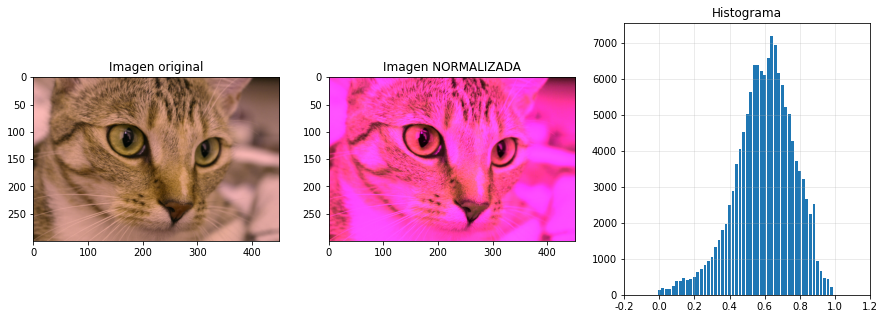

In [ ]:
#RGB
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

#print("Min: "+str(min)+" Max: "+str(max))

#img_rgb = imageio.imread('imageio:chelsea.png')/((max-min)*(255))
#img_gray = rgb2yiq(img_rgb)[:,:,0]

img_normalizada=Normalizar_Imagen(img_rgb)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_normalizada, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_normalizada, 50, axes[2])
axes[2].set_title("Histograma")

entró
el minimo es 0.014792156862745097 y el máx es 0.7613882352941176


Text(0.5, 1.0, 'Histograma')

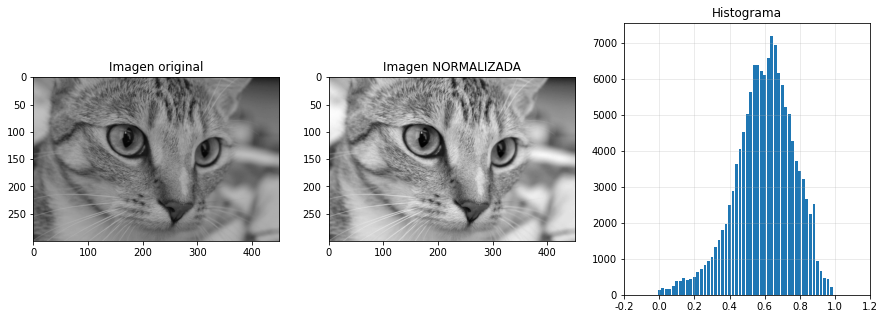

In [ ]:
#PRIMERO PRUEBO LA IMAGEN EN ESCALA DE GRISES
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

#print("Min: "+str(min)+" Max: "+str(max))

#img_rgb = imageio.imread('imageio:chelsea.png')/((max-min)*(255))
#img_gray = rgb2yiq(img_rgb)[:,:,0]

img_normalizada=Normalizar_Imagen(img_gray)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_normalizada,"gray", vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_normalizada, 50, axes[2])
axes[2].set_title("Histograma")

#1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1.
Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

In [ ]:
def Normalizar_Imagen_percentiles(img,P):
  #Primero verifico si la imágen es RGB o no
    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      #img=img/255
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
  
    #Minimo y máximos
    #P=PORCENTAJE
    min=np.percentile(img_gray, P)      #Llevo el 0.14 al 0
    max=np.percentile(img_gray, 100-P)  #Llevo el 0.76 al 1
    print("el minimo es "+str(min)+" y el máx es "+str(max))

    #Normalizar
    lum_normalizada = np.zeros(img.shape[0:2])   # Creo matriz en "blaco", llena de ceros
    lum_normalizada[lum_aux>=max] = 1            # trunco con 1 donde la luminancia sea mayor
    lum_normalizada[(lum_aux>min) & (lum_aux<max)]=(lum_aux[(lum_aux>min) & (lum_aux<max)] - min)/(max-min)   
    #Normalized Image = (Original image - min of image) * ((newMax-newMin) / (ImageMax - ImageMin)) + newMin


    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=lum_normalizada
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=lum_normalizada
      return norm_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.10699960784313725 y el máx es 0.7101725490196078


Text(0.5, 1.0, 'Histograma')

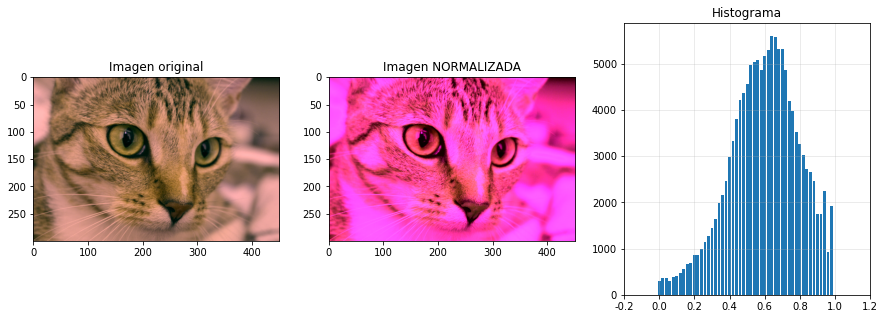

In [ ]:
#RGB
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

P=1                                 #PORCENTAJE
img_normalizada=Normalizar_Imagen_percentiles(img_rgb,P)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_normalizada, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_normalizada, 50, axes[2])
axes[2].set_title("Histograma")

entró
el minimo es 0.10699960784313725 y el máx es 0.7101725490196078


Text(0.5, 1.0, 'Histograma')

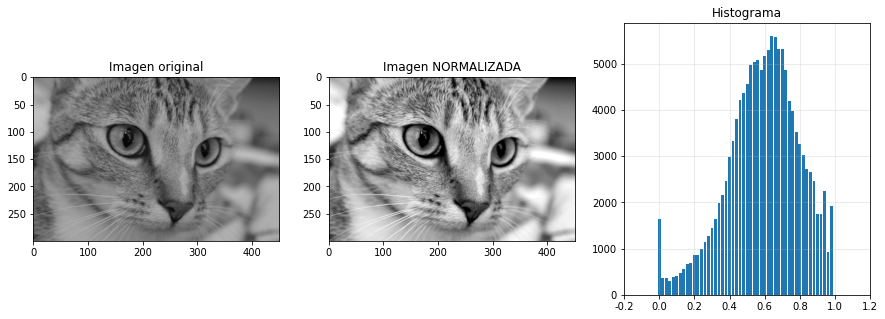

In [ ]:
#gray
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

P=1                                 #PORCENTAJE
img_normalizada=Normalizar_Imagen_percentiles(img_gray,P)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_normalizada,"gray", vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_normalizada, 50, axes[2])
axes[2].set_title("Histograma")


#2. Corrección gamma
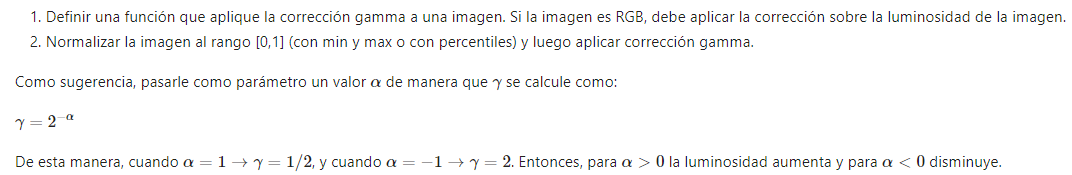

#2.1 Función corrección gamma

In [ ]:
def luminancia_gamma(img, gamma, P):

    #Primero normalizo la imagen con percentiles
    img=Normalizar_Imagen(img)

    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
    
    #cambió de la luminancia con el gamma
    lum_gamma=lum_aux**gamma

    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=lum_gamma
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=lum_gamma
      return norm_img



#2.2 NORMALIZAR CON PERCEPTILES Y APLICAR CORRECCIÓN GAMMA.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.014792156862745097 y el máx es 0.7613882352941176


Text(0.5, 1.0, 'Histograma')

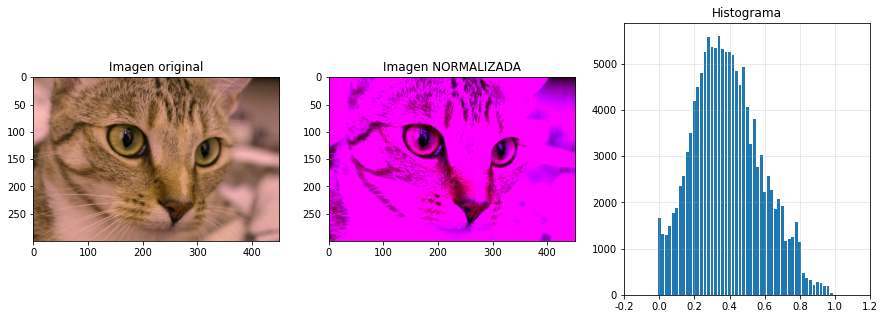

In [ ]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

#alpha=1     #Luminocidad >0 alta si alpha es mayor a 0
alpha=-1    #Luminocidad <0 baja si alpha es menor a 0
gamma=2**(-alpha)

img_nueva = luminancia_gamma(img_rgb, gamma,P=1)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_nueva, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_nueva, 50, axes[2])
axes[2].set_title("Histograma")

#3. Modificación del histograma por una función definida a tramos



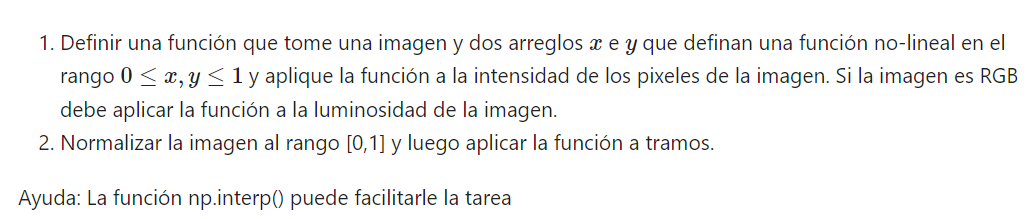

In [ ]:
def Normalizar_A_Tramos(img,P, x, y):

    #Primero normalizo la imagen con percentiles
    img=Normalizar_Imagen_percentiles(img,P)

    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
    
    #Cambio la luminancia a tramos
    lum_a_tramos=np.interp(lum_aux,x,y)

    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=lum_a_tramos
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=lum_a_tramos
      return norm_img



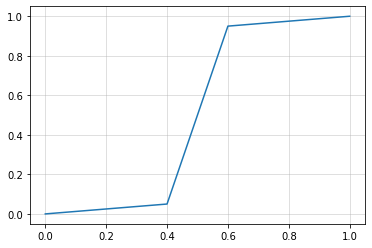

In [ ]:
x = np.array([0, 0.4,  0.6,  1])
y = np.array([0, 0.05, 0.95, 1])
plt.plot(x,y)
plt.grid(alpha=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.10699960784313725 y el máx es 0.7101725490196078


Text(0.5, 1.0, 'Histograma')

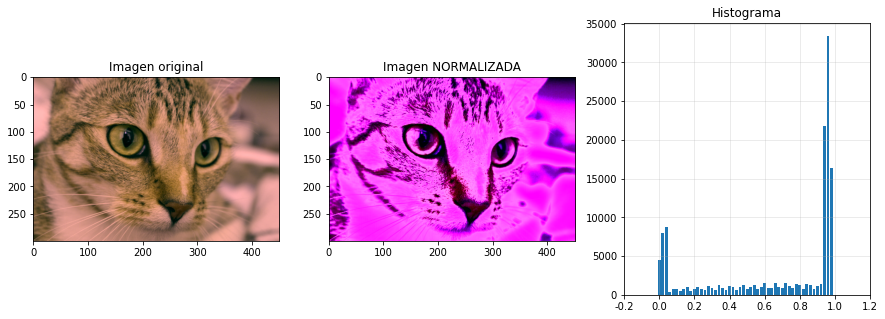

In [ ]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

P=1   #percentil

img_nueva = Normalizar_A_Tramos(img_rgb,P,x,y)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_nueva, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_nueva, 50, axes[2])
axes[2].set_title("Histograma")

#4. Uniformalización del histograma

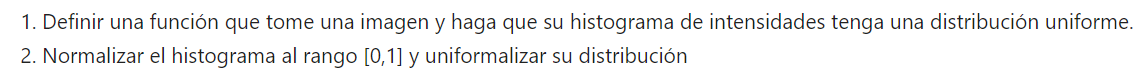

In [ ]:
from skimage import data, img_as_float
from skimage import exposure

def Hist_Uniforme(img):

    #Primero normalizo la imagen con percentiles
    img=Normalizar_Imagen(img)

    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
    
    # Equalization
    img_eq = exposure.equalize_hist(lum_aux)

    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=img_eq
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=img_eq
      return norm_img


entró
el minimo es 0.014792156862745097 y el máx es 0.7613882352941176
entró


Text(0.5, 1.0, 'Histograma')

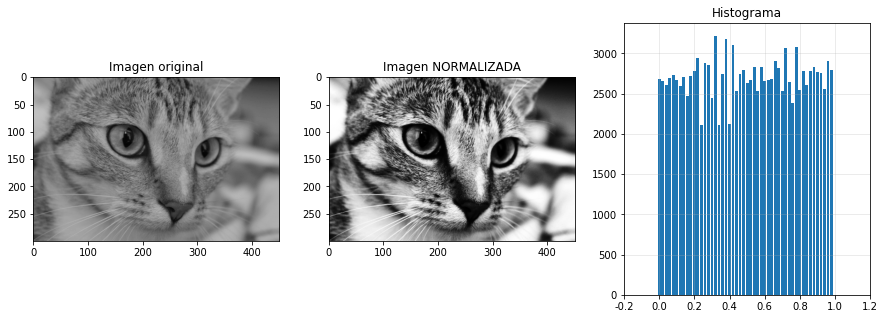

In [ ]:
#gray
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

P=1                                 #PORCENTAJE
img_eq = Hist_Uniforme(img_gray)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_eq,"gray", vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_eq, 50, axes[2])
axes[2].set_title("Histograma")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.014792156862745097 y el máx es 0.7613882352941176


Text(0.5, 1.0, 'Histograma')

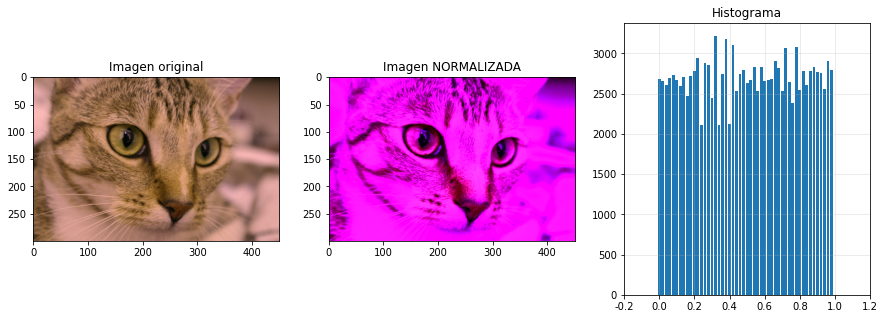

In [ ]:
#RGB
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

img_eq = Hist_Uniforme(img_rgb)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_eq, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_eq, 50, axes[2])
axes[2].set_title("Histograma")

#5. Normalización del histograma

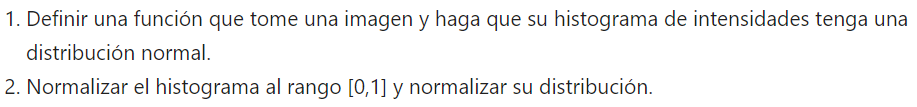

In [ ]:
from scipy.stats import norm

def Hist_Normalizado(img):
    #Primero normalizo la imagen con percentiles
    img=Normalizar_Imagen(img)
    nbins=256

    if(len(img.shape)<3):
      #print('gray')
      lum_aux=img
      is_rgb=False
      print("entró")
    else: 
      #print('Color(RGB)')
      lum_aux=rgb2yiq(img)[:,:,0]
      is_rgb=True
    
    #Agarro el histograma
    hist, _=np.histogram(lum_aux,bins=nbins, range=(0,1))

    #hist_acumulado=exposure.cumulative_distribution(lum_aux,nbins)
    #La función cumsum me permite también tener el histograma acumulado, el otro me tiraba el resultadoe en tuplas
    hist_acumulado = np.cumsum(hist)
    print("acumulado: "+str(hist_acumulado.max()))

   # Ecualizar histograma (norm.ppf es la función inversa a la cdf de la distribución normal)
    mu=0.5      #INDICA LA MEDIA DE LA GAUSSIANA
    escala=0.2
    hist_acumulado_eq=np.round(norm.ppf(hist_acumulado/hist_acumulado.max(), loc=mu, scale=escala)*(nbins-1))
    hist_acumulado_eq=np.clip(hist_acumulado_eq, 0, nbins-1)

    #Lleno el resultado de los pixeles a la imagen resultante 
    img_eq=hist_acumulado_eq[((nbins-1)*lum_aux).astype('uint8')]
    img_eq=img_eq/(nbins-1)


    if is_rgb==True:
      norm_img=img
      norm_img[:,:,0]=img_eq
      norm_img=yiq2rgb(norm_img)
      return norm_img 
    else:
      norm_img=img_eq
      return norm_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


el minimo es 0.014792156862745097 y el máx es 0.7613882352941176
acumulado: 135298


Text(0.5, 1.0, 'Histograma')

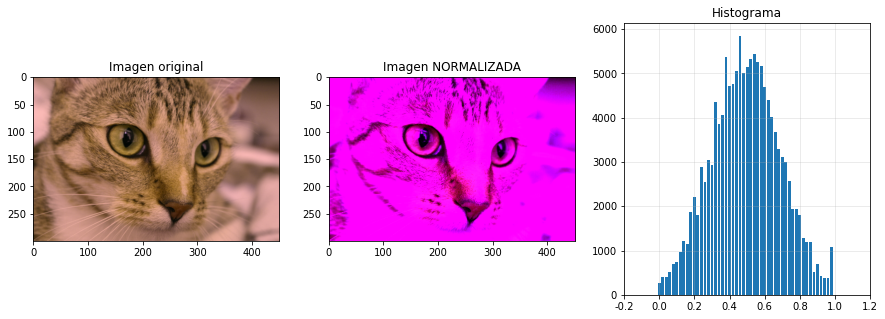

In [ ]:
#RGB
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

img_eq = Hist_Normalizado(img_rgb)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_eq, vmin=0, vmax=1)
axes[1].set_title("Imagen NORMALIZADA")
plot_hist(img_eq, 50, axes[2])
axes[2].set_title("Histograma")